In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

%matplotlib inline

In [44]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

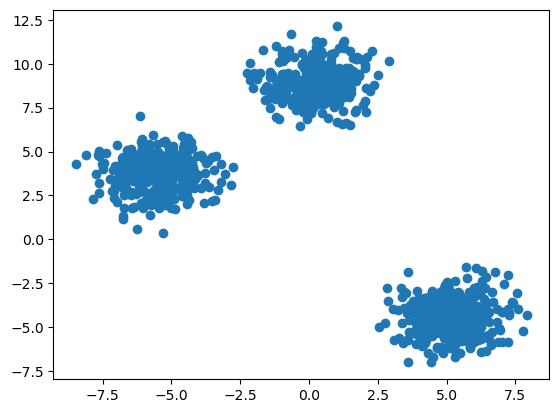

In [45]:
plt.scatter(X[:,0], X[:,1])

In [46]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
# X_train

In [48]:
# y_train

In [49]:
from sklearn.cluster import KMeans

In [50]:
## Elbow method to select the k value
wcss = []
for k in range(1,11):
    Kmeans  = KMeans(n_clusters=k, init="k-means++")
    Kmeans.fit(X_train)
    wcss.append(Kmeans.inertia_)

In [51]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 993.4520325986077,
 853.5028160114396,
 754.3765579043122,
 663.5030188810762,
 579.1420180027519,
 531.3780778199333]

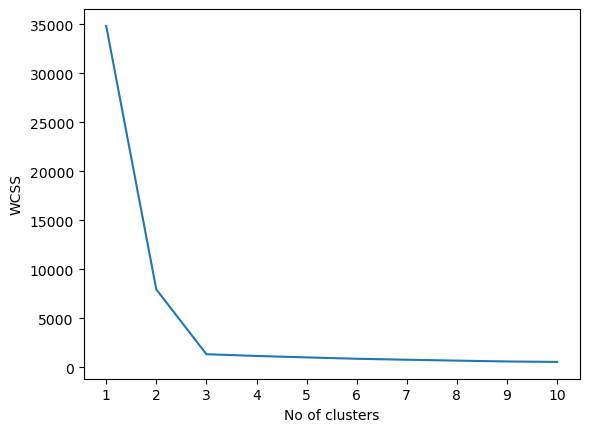

In [52]:
## plot the elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [53]:
Kmeans = KMeans(n_clusters=3, init="k-means++")
Kmeans.fit_predict(X_train)

array([1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2,

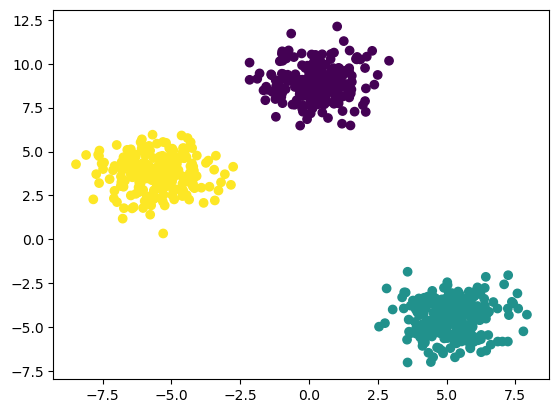

In [54]:
y_labels = Kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)

In [55]:
!pip install kneed

In [56]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
k1.elbow

3

In [57]:
from sklearn.metrics import silhouette_score

In [59]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [60]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.33691828928108875,
 0.333110666014056,
 0.34396398658125094,
 0.34576132198259024,
 0.34218510332140795]

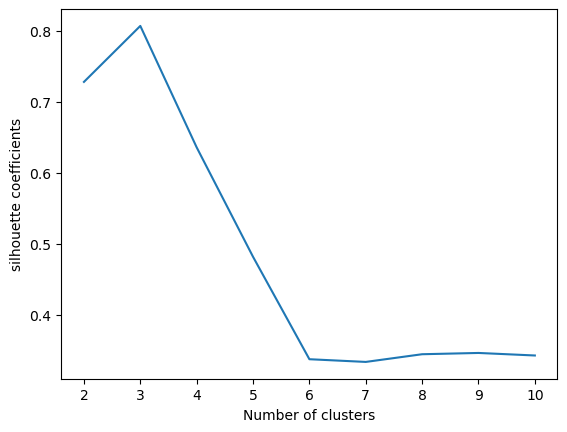

In [62]:
## Plot silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette coefficients")
plt.show()